### Outmigrator Median Income (Individual & Family)
*Does not apply PERWT

In [1]:
import pandas as pd
import altair as alt

In [2]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [3]:
#Removing records with missing income data
indiv_out = outmigrators[(outmigrators.INCTOT != 9999999)]
fam_out = outmigrators[(outmigrators.FTOTINC != 9999999)]

-------

#### (1) Individual Income:

In [4]:
ind_outmigrators_all = {}
for year in range(2006, 2018):
    df = indiv_out[indiv_out.YEAR == year]
    income = df.INCTOT.median()
    ind_outmigrators_all[year] = income

In [5]:
ind_outmigrators_all

{2006: 14000.0,
 2007: 16700.0,
 2008: 15000.0,
 2009: 14400.0,
 2010: 12000.0,
 2011: 9000.0,
 2012: 10000.0,
 2013: 10400.0,
 2014: 13000.0,
 2015: 11300.0,
 2016: 14550.0,
 2017: 15400.0}

In [6]:
out_ind_inc_df = pd.DataFrame.from_dict(ind_outmigrators_all, orient='index')
out_ind_inc_df = out_ind_inc_df.reset_index().rename({'index':'Year', 0:'Med_Income'}, axis=1)

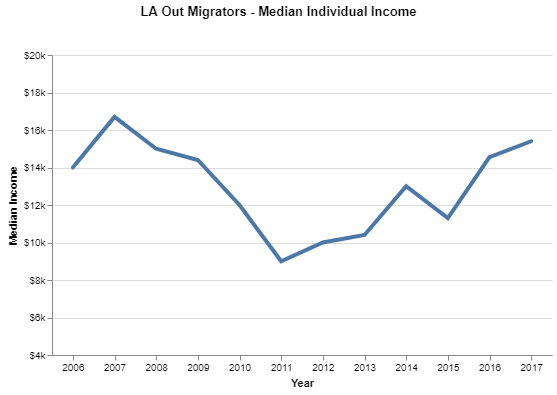

In [7]:
#Plotting w/ Altair
title=alt.TitleParams(text='LA Out Migrators - Median Individual Income', offset=30, anchor='middle')

individual = alt.Chart(out_ind_inc_df).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            axis=alt.Axis(grid=False), 
            title='Year'),
    y=alt.Y('Med_Income', 
            scale=alt.Scale(domain=[4000, 20000]), 
            axis=alt.Axis(format='$s'), 
            title='Median Income')
).properties(title=title, 
             width=500, 
             background='white'
).configure_view(strokeWidth=0)

individual

In [8]:
individual.save('indiv_inc_out_no_perwt.png', scale_factor=3)

-------

#### (2) Family Income:

In [9]:
fam_outmigrators_all = {}
for year in range(2006, 2018):
    df = fam_out[fam_out.YEAR == year]
    income = df.FTOTINC.median()
    fam_outmigrators_all[year] = income

In [10]:
fam_outmigrators_all

{2006: 47400.0,
 2007: 52000.0,
 2008: 52300.0,
 2009: 51000.0,
 2010: 49000.0,
 2011: 45000.0,
 2012: 48780.0,
 2013: 50000.0,
 2014: 54000.0,
 2015: 55000.0,
 2016: 60000.0,
 2017: 61500.0}

In [11]:
out_fam_inc_df = pd.DataFrame.from_dict(fam_outmigrators_all, orient='index')
out_fam_inc_df = out_fam_inc_df.reset_index().rename({'index':'Year', 0:'Med_Income'}, axis=1)

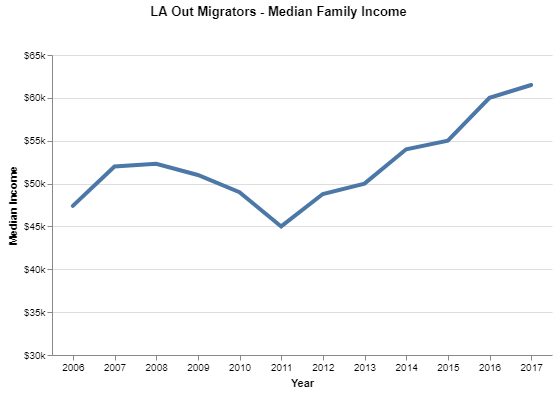

In [12]:
#Plotting w/ Altair
title=alt.TitleParams(text='LA Out Migrators - Median Family Income', offset=30, anchor='middle')

family = alt.Chart(out_fam_inc_df).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            axis=alt.Axis(grid=False), 
            title='Year'),
    y=alt.Y('Med_Income', 
            scale=alt.Scale(domain=[30000,65000]), 
            axis=alt.Axis(format='$s'), 
            title='Median Income')
).properties(title=title, 
             width=500, 
             background='white'
).configure_view(strokeWidth=0)

family

In [13]:
family.save('fam_inc_out_no_perwt.png', scale_factor=3)